In [37]:
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [38]:
data1 = pd.read_csv('data_labeled/data_1_2024_labeled.csv')
data2 = pd.read_csv('data_labeled/data_2_2024_labeled.csv')
data3 = pd.read_csv('data_labeled/data_3_2024_labeled.csv')
data4 = pd.read_csv('data_labeled/data_4_2024_labeled.csv')

In [39]:
# data = pd.concat([data2, data3, data4], ignore_index=True)

In [40]:
data1.label = data1.label.replace({
    'positif':'Positif', 
    ' positif':'Positif',
    'System: Positif' : 'Positif',
    'System: Negatif' : 'Negatif',
    'System: Netral' : 'Netral',
    'Netral.' : 'Netral',
    'Negatif.' : 'Negatif',
})

data2.label = data2.label.replace({
    'positif':'Positif', 
    ' positif':'Positif',
    'System: Positif' : 'Positif',
    'System: Negatif' : 'Negatif',
    'System: Netral' : 'Netral',
    'Netral.' : 'Netral',
    'Negatif.' : 'Negatif',
})

data3.label = data3.label.replace({
    'positif':'Positif', 
    ' positif':'Positif',
    'System: Positif' : 'Positif',
    'System: Negatif' : 'Negatif',
    'System: Netral' : 'Netral',
    'Netral.' : 'Netral',
    'Negatif.' : 'Negatif',
})

data4.label = data4.label.replace({
    'positif':'Positif', 
    ' positif':'Positif',
    'System: Positif' : 'Positif',
    'System: Negatif' : 'Negatif',
    'System: Netral' : 'Netral',
    'Netral.' : 'Netral',
    'Negatif.' : 'Negatif',
})

In [41]:
data1 = data1[data1.label.isin(['Positif', 'Negatif'])]
data2 = data2[data2.label.isin(['Positif', 'Negatif'])]
data3 = data3[data3.label.isin(['Positif', 'Negatif'])]
data4 = data4[data4.label.isin(['Positif', 'Negatif'])]

In [42]:
data1.judul = data1.judul.str.replace('\n', '')
data2.judul = data2.judul.str.replace('\n', '')
data3.judul = data3.judul.str.replace('\n', '')
data4.judul = data4.judul.str.replace('\n', '')

In [43]:
def noise_removal(words):
    words=words.translate(str.maketrans('','',string.punctuation+string.digits))
    words=words.strip()
    return words

In [44]:
data1.judul = data1.judul.apply(noise_removal)
data2.judul = data2.judul.apply(noise_removal)
data3.judul = data3.judul.apply(noise_removal)
data4.judul = data4.judul.apply(noise_removal)

In [45]:
data1.judul = data1.judul.str.lower()
data2.judul = data2.judul.str.lower()
data3.judul = data3.judul.str.lower()
data4.judul = data4.judul.str.lower()

In [46]:
def tokenisasi(words):
    return word_tokenize(words)

In [47]:
data1.judul =  data1.judul.apply(tokenisasi)
data2.judul =  data2.judul.apply(tokenisasi)
data3.judul =  data3.judul.apply(tokenisasi)
data4.judul =  data4.judul.apply(tokenisasi)

In [48]:
indo_stopword=stopwords.words('indonesian')

In [49]:
def stopwords_removal(words):
    return [word for word in words if word not in indo_stopword]

In [50]:
data1.judul =  data1.judul.apply(stopwords_removal)
data2.judul =  data2.judul.apply(stopwords_removal)
data3.judul =  data3.judul.apply(stopwords_removal)
data4.judul =  data4.judul.apply(stopwords_removal)

In [52]:
def list_text(token):
    text=' '
    return text.join(token)

In [53]:
data1.judul =  data1.judul.apply(list_text)
data2.judul =  data2.judul.apply(list_text)
data3.judul =  data3.judul.apply(list_text)
data4.judul =  data4.judul.apply(list_text)

# distribusi sentiment tiap bulan

In [65]:
def pie(data, bln):
    label_counts = data['label'].value_counts()

    sns.set_theme(style="whitegrid")

    labels = label_counts.index
    sizes = label_counts.values
    colors = sns.color_palette('pastel')[0:2]
    explode = (0.1, 0)  # explode the first slice (Negatif)

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
    plt.title(f'Sentiment Distribution untuk Bulan {bln} 2024')
    plt.show()

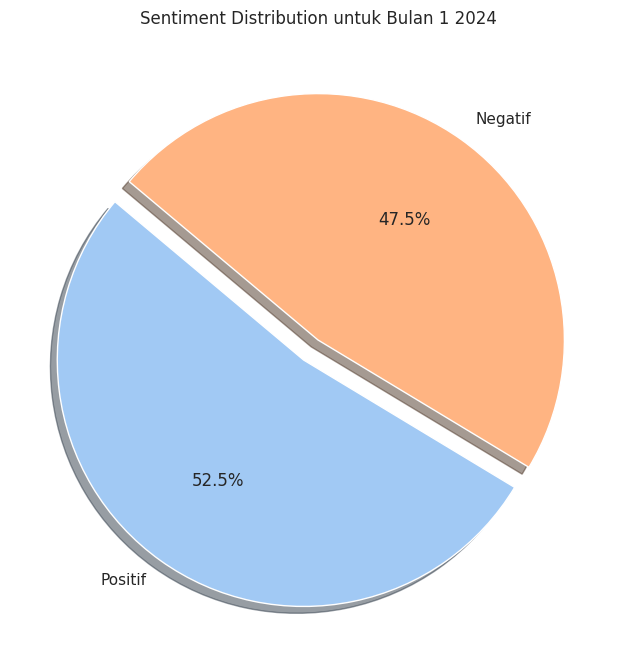

In [66]:
pie(data1, 1)

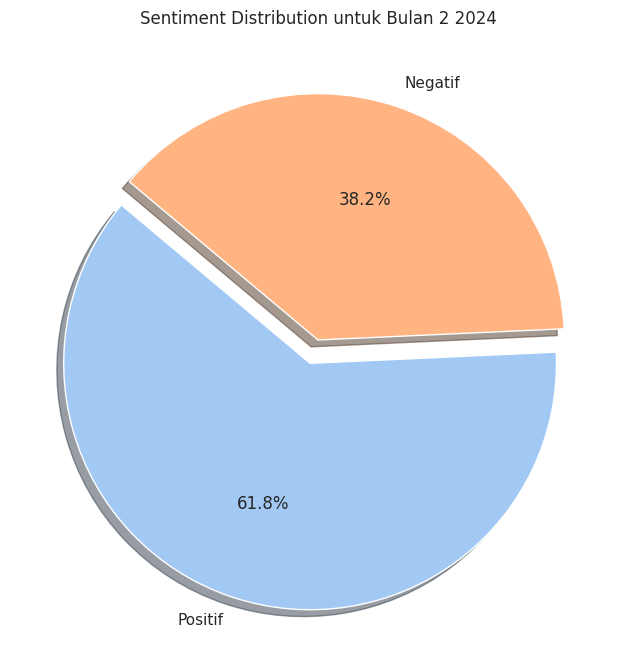

In [67]:
pie(data2, 2)

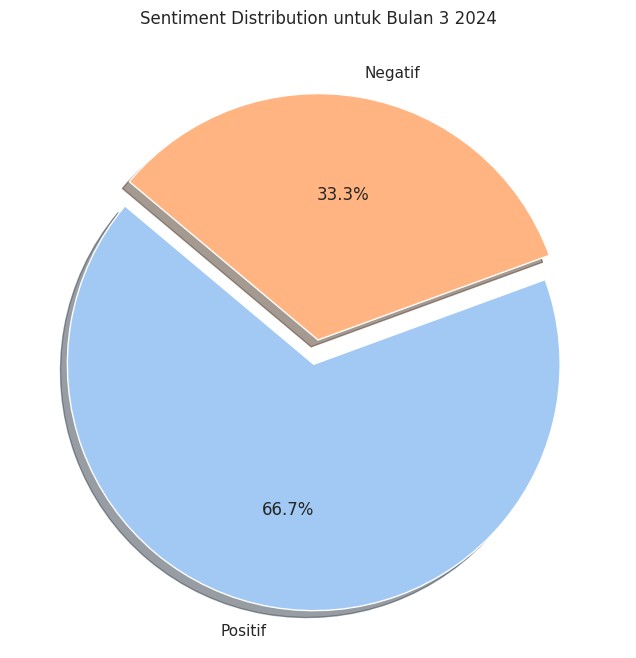

In [68]:
pie(data3, 3)

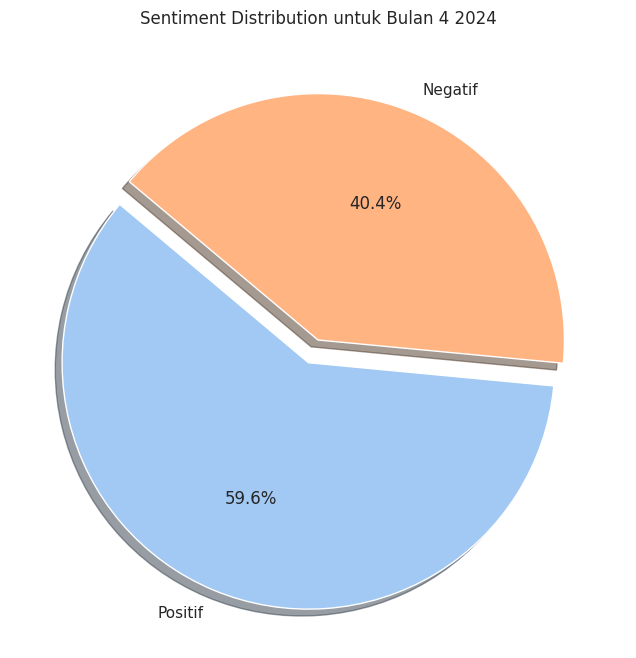

In [69]:
pie(data4, 4)

# WordCloud dari berita Positif dan Negatif

In [80]:
def wordCloud(text):
    wordcloud=WordCloud(background_color='black', width=1920,height=1080,
                    contour_width=2, contour_color='blue', colormap='BuPu_r')
    wordcloud.generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [98]:
data = pd.concat([data1, data2, data3, data4], ignore_index=True)

## Positif

In [100]:
text = data.judul[data.label == 'Positif'].to_string()

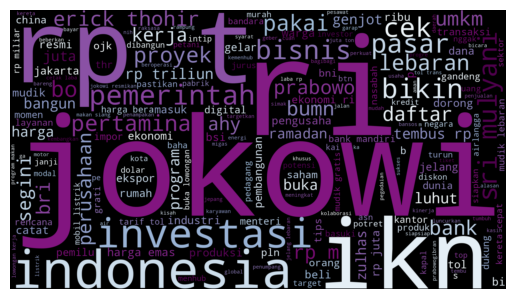

In [101]:
wordCloud(text)

## Negatif

In [102]:
text = data.judul[data.label == 'Negatif'].to_string()

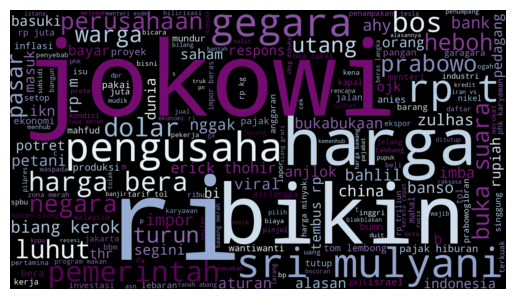

In [103]:
wordCloud(text)